In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=None


### Loading Data

In [2]:
df = pd.read_csv('klapeye-global-terrorism.csv',parse_dates=['DATE'])
df

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
0,2023-04-02,Russia,NaN,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger Vladlen Ta...,"64.6863136,97.7453061",Explosion
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in Bolan, Balochis...","24.8546842,67.0207055",Explosion
2,2023-02-17,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 Karachi Police Station Attack occurre...,"24.8546842,67.0207055",Assault
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,"34.0123846,71.5787458",Explosion
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,Seven people were shot and killed and at least...,"31.7788242,35.2257626",Assault
...,...,...,...,...,...,...,...,...,...,...,...,...
27172,1968-02-21,United States,Washington,NaN,Northern America,Americas,NaN,0.0,0.0,The Soviet embassy was bombed in the early mor...,"38.8950368,-77.0365427",Explosion
27173,1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,South America,Americas,NaN,0.0,0.0,An explosion from a single stick of dynamite w...,"-33.4377756,-70.6504502",Explosion
27174,1968-02-13,Uruguay,NaN,NaN,South America,NaN,NaN,0.0,0.0,A Molotov cocktail was thrown outside the U.S....,"-32.8755548,-56.0201525",NaN
27175,1968-02-12,Dominican Republic,Distrito Nacional,Santo Domingo,Caribbean,Americas,NaN,0.0,0.0,A homemade bomb was found behind books on the ...,"18.4801972,-69.942111",Explosion


In [296]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27177 entries, 0 to 27176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         27177 non-null  datetime64[ns]
 1   COUNTRY      27177 non-null  object        
 2   STATE        15423 non-null  object        
 3   CITY         13151 non-null  object        
 4   SUBREGION    21182 non-null  object        
 5   REGION       21177 non-null  object        
 6   PERPETRATOR  10153 non-null  object        
 7   INJURED      27172 non-null  float64       
 8   DEAD         27176 non-null  float64       
 9   DESCRIPTION  27177 non-null  object        
 10  COORDINATES  27169 non-null  object        
 11  CATEGORY     21582 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 2.5+ MB


In [3]:
df.isnull().sum()

DATE               0
COUNTRY            0
STATE          11754
CITY           14026
SUBREGION       5995
REGION          6000
PERPETRATOR    17024
INJURED            5
DEAD               1
DESCRIPTION        0
COORDINATES        8
CATEGORY        5595
dtype: int64

### Filling null values in Injured and Dead column

In [7]:
df['DEAD'].value_counts().index[0]

0.0

In [4]:
c= df['INJURED'].value_counts().index[0]
d = df['DEAD'].value_counts().index[0]
c
d

0.0

In [299]:
df = df.fillna(
    {
        'INJURED':c,
        'DEAD':d
    }
    )


### Creating new column DAMAGE

In [300]:
df['DAMAGE'] = df['INJURED'] + df['DEAD']
df

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY,DAMAGE
0,2023-04-02,Russia,NaN,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger Vladlen Ta...,"64.6863136,97.7453061",Explosion,43.0
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in Bolan, Balochis...","24.8546842,67.0207055",Explosion,22.0
2,2023-02-17,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 Karachi Police Station Attack occurre...,"24.8546842,67.0207055",Assault,21.0
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,"34.0123846,71.5787458",Explosion,321.0
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,Seven people were shot and killed and at least...,"31.7788242,35.2257626",Assault,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27172,1968-02-21,United States,Washington,NaN,Northern America,Americas,NaN,0.0,0.0,The Soviet embassy was bombed in the early mor...,"38.8950368,-77.0365427",Explosion,0.0
27173,1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,South America,Americas,NaN,0.0,0.0,An explosion from a single stick of dynamite w...,"-33.4377756,-70.6504502",Explosion,0.0
27174,1968-02-13,Uruguay,NaN,NaN,South America,NaN,NaN,0.0,0.0,A Molotov cocktail was thrown outside the U.S....,"-32.8755548,-56.0201525",NaN,0.0
27175,1968-02-12,Dominican Republic,Distrito Nacional,Santo Domingo,Caribbean,Americas,NaN,0.0,0.0,A homemade bomb was found behind books on the ...,"18.4801972,-69.942111",Explosion,0.0


### Dropping irrelevant columns

In [301]:
df = df.drop(columns=['DESCRIPTION','REGION','SUBREGION'])
df

,DATE,COUNTRY,STATE,CITY,PERPETRATOR,INJURED,DEAD,COORDINATES,CATEGORY,DAMAGE
0,2023-04-02,Russia,NaN,Saint Petersburg,Darya Trepova,42.0,1.0,"64.6863136,97.7453061",Explosion,43.0
1,2023-03-06,Pakistan,Sindh,Karachi,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"24.8546842,67.0207055",Explosion,22.0
2,2023-02-17,Pakistan,Sindh,Karachi,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,"24.8546842,67.0207055",Assault,21.0
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Jamaat-ul-Ahrar,220.0,101.0,"34.0123846,71.5787458",Explosion,321.0
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Palestinian Islamic Jihad (PIJ),3.0,7.0,"31.7788242,35.2257626",Assault,10.0
...,...,...,...,...,...,...,...,...,...,...
27172,1968-02-21,United States,Washington,NaN,NaN,0.0,0.0,"38.8950368,-77.0365427",Explosion,0.0
27173,1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,NaN,0.0,0.0,"-33.4377756,-70.6504502",Explosion,0.0
27174,1968-02-13,Uruguay,NaN,NaN,NaN,0.0,0.0,"-32.8755548,-56.0201525",NaN,0.0
27175,1968-02-12,Dominican Republic,Distrito Nacional,Santo Domingo,NaN,0.0,0.0,"18.4801972,-69.942111",Explosion,0.0


### CountryWise Total damage,total deaths

In [302]:
ddf = df.groupby('COUNTRY').agg(
    total_injured = ('INJURED','sum'),
    total_deaths = ('DEAD','sum'),
    total_damage = ('DAMAGE','sum')                    
)
ddf.reset_index()

,COUNTRY,total_injured,total_deaths,total_damage
0,Afghanistan,8998.0,6082.0,15080.0
1,Albania,20.0,9.0,29.0
2,Algeria,1832.0,1482.0,3314.0
3,Angola,301.0,566.0,867.0
4,Argentina,1118.0,271.0,1389.0
...,...,...,...,...
170,Vietnam,0.0,76.0,76.0
171,Yemen,1234.0,660.0,1894.0
172,Zaire,0.0,5.0,5.0
173,Zambia,34.0,10.0,44.0


### Sorting data on behalf of Total Damage

In [303]:
ddf = ddf.sort_values(by='total_damage',ascending=False)
ddf = ddf.head(10)
ddf = ddf.reset_index()
ddf

,COUNTRY,total_injured,total_deaths,total_damage
0,Iraq,42382.0,23045.0,65427.0
1,India,11152.0,4372.0,15524.0
2,Pakistan,11074.0,4417.0,15491.0
3,Afghanistan,8998.0,6082.0,15080.0
4,Israel,8180.0,1777.0,9957.0
5,United States,5797.0,3517.0,9314.0
6,Sri Lanka,5543.0,2871.0,8414.0
7,Russia,5510.0,2535.0,8045.0
8,Colombia,4598.0,2679.0,7277.0
9,Japan,6086.0,40.0,6126.0


In [304]:
ddf.to_csv('country_damage.csv')

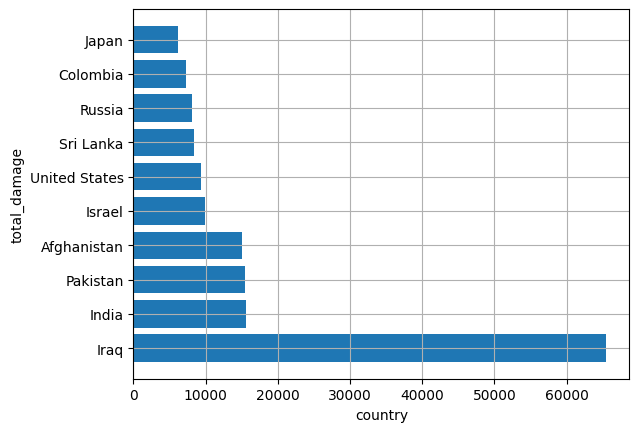

In [305]:
plt.barh(ddf['COUNTRY'],ddf['total_damage'])
plt.xlabel('country')
plt.ylabel('total_damage')
plt.grid()
plt.show()

In [306]:
df


,DATE,COUNTRY,STATE,CITY,PERPETRATOR,INJURED,DEAD,COORDINATES,CATEGORY,DAMAGE
0,2023-04-02,Russia,NaN,Saint Petersburg,Darya Trepova,42.0,1.0,"64.6863136,97.7453061",Explosion,43.0
1,2023-03-06,Pakistan,Sindh,Karachi,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"24.8546842,67.0207055",Explosion,22.0
2,2023-02-17,Pakistan,Sindh,Karachi,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,"24.8546842,67.0207055",Assault,21.0
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Jamaat-ul-Ahrar,220.0,101.0,"34.0123846,71.5787458",Explosion,321.0
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Palestinian Islamic Jihad (PIJ),3.0,7.0,"31.7788242,35.2257626",Assault,10.0
...,...,...,...,...,...,...,...,...,...,...
27172,1968-02-21,United States,Washington,NaN,NaN,0.0,0.0,"38.8950368,-77.0365427",Explosion,0.0
27173,1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,NaN,0.0,0.0,"-33.4377756,-70.6504502",Explosion,0.0
27174,1968-02-13,Uruguay,NaN,NaN,NaN,0.0,0.0,"-32.8755548,-56.0201525",NaN,0.0
27175,1968-02-12,Dominican Republic,Distrito Nacional,Santo Domingo,NaN,0.0,0.0,"18.4801972,-69.942111",Explosion,0.0


### Because city column have many null values,so we need to get only data which have no null values

In [307]:
cdf = df.dropna(subset='CITY')
cdf

,DATE,COUNTRY,STATE,CITY,PERPETRATOR,INJURED,DEAD,COORDINATES,CATEGORY,DAMAGE
0,2023-04-02,Russia,NaN,Saint Petersburg,Darya Trepova,42.0,1.0,"64.6863136,97.7453061",Explosion,43.0
1,2023-03-06,Pakistan,Sindh,Karachi,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"24.8546842,67.0207055",Explosion,22.0
2,2023-02-17,Pakistan,Sindh,Karachi,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,"24.8546842,67.0207055",Assault,21.0
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Jamaat-ul-Ahrar,220.0,101.0,"34.0123846,71.5787458",Explosion,321.0
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Palestinian Islamic Jihad (PIJ),3.0,7.0,"31.7788242,35.2257626",Assault,10.0
...,...,...,...,...,...,...,...,...,...,...
27164,1968-03-15,Austria,Carinthia,Klagenfurt,NaN,0.0,0.0,"46.6228162,14.3079604",Explosion,0.0
27168,1968-03-05,Colombia,La Guajira,Riohacha,National Liberation Army of Colombia (ELN),0.0,0.0,"11.5352153,-72.9119566",NaN,0.0
27170,1968-02-22,Ecuador,Pichincha Province,Quito,NaN,0.0,0.0,"-0.2201641,-78.5123274",Explosion,0.0
27173,1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,NaN,0.0,0.0,"-33.4377756,-70.6504502",Explosion,0.0


### Country & city wise total damage

In [308]:
cdf = cdf.groupby(['COUNTRY','CITY']).agg(
    
    total_damage = ('DAMAGE','sum')
)
cdf = cdf.reset_index()
cdf

,COUNTRY,CITY,total_damage
0,Afghanistan,Asadabad,6.0
1,Afghanistan,Baraki Barak,0.0
2,Afghanistan,Charikar,26.0
3,Afghanistan,Gardez,27.0
4,Afghanistan,Gereshk,2.0
...,...,...,...
1799,Zimbabwe,Bulawayo,54.0
1800,Zimbabwe,Harare,23.0
1801,Zimbabwe,Kariba,1.0
1802,Zimbabwe,Mutare,0.0


### Sorting data on behalf of Country,total_damage

In [309]:
cdf = cdf.sort_values(by=['COUNTRY','total_damage'],ascending=[True,False])
cdf.head(20)

,COUNTRY,CITY,total_damage
6,Afghanistan,Kunduz,211.0
5,Afghanistan,Kabul,60.0
9,Afghanistan,Zaranj,59.0
3,Afghanistan,Gardez,27.0
2,Afghanistan,Charikar,26.0
0,Afghanistan,Asadabad,6.0
7,Afghanistan,Maymana,6.0
8,Afghanistan,Taloqan,5.0
4,Afghanistan,Gereshk,2.0
1,Afghanistan,Baraki Barak,0.0


In [310]:
cdf.to_csv('Country_city.csv')

In [311]:
countries = cdf['COUNTRY'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote D'Ivoire (Ivory Coast)", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji Islands', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Greece', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Lithuania', 'Macedonia', 'Malaysia', 'Maldives', 'M

### Find Top 5 total_damage of each countries 

In [312]:
for country in countries:
    ndf = cdf.loc[cdf['COUNTRY']==country]
    ndf = ndf.head()
    print(ndf)

       COUNTRY      CITY  total_damage
6  Afghanistan    Kunduz         211.0
5  Afghanistan     Kabul          60.0
9  Afghanistan    Zaranj          59.0
3  Afghanistan    Gardez          27.0
2  Afghanistan  Charikar          26.0
    COUNTRY          CITY  total_damage
10  Albania  Bajram Curri           4.0
12  Albania        Tirana           3.0
11  Albania          Fier           1.0
    COUNTRY            CITY  total_damage
20  Algeria       Lakhdaria          71.0
16  Algeria        Boufarik          66.0
15  Algeria       Birkhadem          44.0
19  Algeria  Khemis Miliana          42.0
17  Algeria          Dellys          36.0
   COUNTRY     CITY  total_damage
26  Angola   Luanda         428.0
25  Angola   Huambo         230.0
27  Angola   Lucapa          20.0
28  Angola    Sumbe           6.0
24  Angola  Cabinda           5.0
      COUNTRY          CITY  total_damage
30  Argentina  Buenos Aires        1227.0
33  Argentina       Formosa          47.0
34  Argentina       Rosa

In [313]:
edf = pd.DataFrame()
for country in countries:
    ndf = cdf.loc[cdf['COUNTRY']==country]
    ndf = ndf.head()
    edf = pd.concat([edf,ndf])
    
print(edf)

          COUNTRY        CITY  total_damage
6     Afghanistan      Kunduz         211.0
5     Afghanistan       Kabul          60.0
9     Afghanistan      Zaranj          59.0
3     Afghanistan      Gardez          27.0
2     Afghanistan    Charikar          26.0
...           ...         ...           ...
1799     Zimbabwe    Bulawayo          54.0
1800     Zimbabwe      Harare          23.0
1801     Zimbabwe      Kariba           1.0
1802     Zimbabwe      Mutare           0.0
1803     Zimbabwe  Penhalonga           0.0

[417 rows x 3 columns]


In [314]:
edf.to_csv('top5city.csv',index=False)

### Yearwise Analysis

In [315]:
df.head()

,DATE,COUNTRY,STATE,CITY,PERPETRATOR,INJURED,DEAD,COORDINATES,CATEGORY,DAMAGE
0,2023-04-02,Russia,NaN,Saint Petersburg,Darya Trepova,42.0,1.0,"64.6863136,97.7453061",Explosion,43.0
1,2023-03-06,Pakistan,Sindh,Karachi,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"24.8546842,67.0207055",Explosion,22.0
2,2023-02-17,Pakistan,Sindh,Karachi,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,"24.8546842,67.0207055",Assault,21.0
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Jamaat-ul-Ahrar,220.0,101.0,"34.0123846,71.5787458",Explosion,321.0
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Palestinian Islamic Jihad (PIJ),3.0,7.0,"31.7788242,35.2257626",Assault,10.0


### Creating new column 'YEAR'

In [316]:
df['YEAR'] = df['DATE'].dt.year
df.head(1)

,DATE,COUNTRY,STATE,CITY,PERPETRATOR,INJURED,DEAD,COORDINATES,CATEGORY,DAMAGE,YEAR
0,2023-04-02,Russia,NaN,Saint Petersburg,Darya Trepova,42.0,1.0,"64.6863136,97.7453061",Explosion,43.0,2023


### In which year damage has done most

In [323]:
y1df = df.groupby('YEAR').agg(
    sum=('DAMAGE','sum')).reset_index()
y1df = y1df.sort_values(by='sum',ascending=False).head(20)
y1df

,YEAR,sum
39,2007,24078.0
38,2006,19208.0
40,2008,19087.0
37,2005,18025.0
36,2004,14075.0
33,2001,12402.0
44,2016,12400.0
30,1998,10533.0
34,2002,9259.0
35,2003,8687.0


### In which year,which country was attacked most

In [ ]:
ydf = df.groupby(['COUNTRY','YEAR']).agg(
    count=('YEAR','count')
).sort_values(by=['COUNTRY','count'],ascending=[True,False]).reset_index()
ydf

,COUNTRY,YEAR,count
0,Afghanistan,2008,343
1,Afghanistan,2006,279
2,Afghanistan,2007,247
3,Afghanistan,2009,240
4,Afghanistan,2005,170
...,...,...,...
2582,Zimbabwe,1988,1
2583,Zimbabwe,1990,1
2584,Zimbabwe,1995,1
2585,Zimbabwe,2007,1


In [ ]:
e1df = pd.DataFrame()
for country in countries:
    n1df = ydf.loc[ydf['COUNTRY']==country]
    n1df = n1df.head()
    e1df = pd.concat([e1df,n1df])
    
e1df

,COUNTRY,YEAR,count
0,Afghanistan,2008,343
1,Afghanistan,2006,279
2,Afghanistan,2007,247
3,Afghanistan,2009,240
4,Afghanistan,2005,170
...,...,...,...
2574,Zimbabwe,1978,6
2575,Zimbabwe,1987,5
2576,Zimbabwe,1977,4
2577,Zimbabwe,1976,2


### Analysis on Pakistan

In [ ]:
pak_df = df.loc[df['COUNTRY']=='Pakistan']
pak_df.head()

,DATE,COUNTRY,STATE,CITY,PERPETRATOR,INJURED,DEAD,COORDINATES,CATEGORY,DAMAGE,YEAR
1,2023-03-06,Pakistan,Sindh,Karachi,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"24.8546842,67.0207055",Explosion,22.0,2023
2,2023-02-17,Pakistan,Sindh,Karachi,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,"24.8546842,67.0207055",Assault,21.0,2023
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Jamaat-ul-Ahrar,220.0,101.0,"34.0123846,71.5787458",Explosion,321.0,2023
17,2022-04-26,Pakistan,Sindh,Karachi,Baloch Liberation Army,4.0,4.0,"24.8546842,67.0207055",Explosion,8.0,2022
26,2022-03-04,Pakistan,Khyber Pakhtunkhwa,Peshawar,Islamic State – Khorasan Province,196.0,63.0,"34.0123846,71.5787458","Assault,Explosion",259.0,2022


### Which Perpetrator attacked most in Pakistan

In [ ]:
s = pak_df['PERPETRATOR'].value_counts().head(10)
s

PERPETRATOR
Taliban                             59
Baloch Liberation Army              47
Lashkar-e-Jhangvi                   15
Islamic State                       11
Jamaat-ul-Ahrar                      8
Amal                                 3
Mutthaida Qami Movement (MQM)        3
Research and Analysis Wing (RAW)     3
Harkat ul-Mujahedin                  3
Abu Nidal Organization (ANO)         2
Name: count, dtype: int64

### Which type of Attack occur most

In [ ]:
pak_df['CATEGORY'].value_counts()

CATEGORY
Explosion                     689
Assault                       128
Assault,Explosion              33
Hostage                        22
Assault,Hostage                12
Explosion,Hostage               3
Explosion,Accident              1
Assault,Explosion,Accident      1
Name: count, dtype: int64

### State,city wise total damage

In [ ]:
pak_df.groupby(['STATE','CITY']).agg(
    count=('DAMAGE','count')
).sort_values(by=['STATE','count'],ascending=[True,False]).reset_index()

,STATE,CITY,count
0,Balochistan,Quetta,110
1,Balochistan,Dera Bugti,22
2,Balochistan,Kohlu,16
3,Balochistan,Mastung,15
4,Balochistan,Barkhan,6
...,...,...,...
60,Sindh,Sukkur,2
61,Sindh,Khairpur,1
62,Sindh,Nasirabad,1
63,Sindh,Sakrand,1


### Category wise Analysis

In [ ]:
df['CATEGORY'].value_counts()

CATEGORY
Explosion                     13640
Assault                        4659
Hostage                        1363
Assault,Explosion              1290
Assault,Hostage                 435
Explosion,Hostage                86
Assault,Explosion,Hostage        48
Explosion,Accident               40
Accident                          9
Assault,Explosion,Accident        5
Assault,Accident                  5
Assault,Hostage,Accident          2
Name: count, dtype: int64

### Which country faces which category of attack most

In [ ]:
df.groupby(['COUNTRY','CATEGORY']).agg(
    count=('CATEGORY','count')
).sort_values(by='count',ascending=False).head(20)

count
COUNTRY        CATEGORY                
Iraq           Explosion           2252
               Assault             1165
France         Explosion            723
Afghanistan    Explosion            693
Pakistan       Explosion            689
Turkey         Explosion            652
Spain          Explosion            625
United Kingdom Explosion            590
India          Explosion            589
Colombia       Explosion            573
Gaza           Assault              553
Thailand       Assault,Explosion    528
Israel         Assault              504
Russia         Explosion            426
Israel         Explosion            414
Greece         Explosion            360
Afghanistan    Assault              330
United States  Explosion            308
India          Assault              296
Colombia       Hostage              272

### Perpetrator Analysis

In [ ]:
df['PERPETRATOR'].value_counts()

PERPETRATOR
Taliban                                              906
Revolutionary Armed Forces of Colombia (FARC)        584
Communist Party                                      485
Basque Fatherland and Freedom (ETA)                  322
Hamas (Islamic Resistance Movement)                  321
                                                    ... 
Kenkokugiyudan Betsudotai Kokuzokseibatsutai           1
Caucasian Front for the Liberation of Abu Achikob      1
Muslim United Army                                     1
Knights of the Torched Bank                            1
Frente de Liberacion Nacional del Vietnam del Sur      1
Name: count, Length: 1166, dtype: int64

In [ ]:
odf = df.groupby(['PERPETRATOR','COUNTRY']).agg(
    active = ('PERPETRATOR','count')
).sort_values(by=['PERPETRATOR','active'],ascending=False)

odf.to_csv('org_country.csv')


### Suicide wise attacks commits

In [ ]:
df = pd.read_csv('klapeye-global-terrorism.csv')
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()
df['DESCRIPTION']

0        during a speech by military blogger vladlen ta...
1        a terrorist attack occurred in bolan, balochis...
2        the 2023 karachi police station attack occurre...
3        a suicide attacker detonated a bomb during aft...
4        seven people were shot and killed and at least...
                               ...                        
27172    the soviet embassy was bombed in the early mor...
27173    an explosion from a single stick of dynamite w...
27174    a molotov cocktail was thrown outside the u.s....
27175    a homemade bomb was found behind books on the ...
27176    the second floor of the u.s. embassy residence...
Name: DESCRIPTION, Length: 27177, dtype: object

### Suicide wise attacked analysis in india

In [ ]:
ndf = df.loc[(df['DESCRIPTION'].str.contains('suicide')) & (df['COUNTRY']=='India')]
ndf

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
163,2019-02-14,India,Jammu and Kashmir,Pulwama,Southern Asia,Asia,Jaish-e-Mohammad (JeM),35.0,40.0,40 personnel belonging to central reserve poli...,"33.89829355,74.89634093792017",Explosion
7127,2006-05-23,India,NaN,NaN,Southern Asia,Asia,Hizbul Mujahideen (HM),25.0,1.0,"in hyderpora, a suicide bomber blew up his exp...","22.3511148,78.6677428",Explosion
8700,2005-11-14,India,Jammu and Kashmir,Srinagar,Southern Asia,Asia,Al Mansooran,17.0,4.0,an attack at a lalchowk business hub in srinag...,"34.0747444,74.8204443","Assault,Explosion"
8795,2005-11-02,India,Jammu and Kashmir,Srinagar,Southern Asia,Asia,Jaish-e-Mohammad (JeM),18.0,10.0,on the day when the new chief minister of jamm...,"34.0747444,74.8204443",Explosion
11813,2004-07-24,India,Jammu and Kashmir,Srinagar,Southern Asia,Asia,Al Mansooran,2.0,5.0,a suicide bomber detonated an explosive device...,"34.0747444,74.8204443","Assault,Explosion"
16375,2001-10-01,India,Jammu and Kashmir,Srinagar,Southern Asia,Asia,Jaish-e-Mohammad (JeM),60.0,38.0,a suicide car bomb exploded outside the state ...,"34.0747444,74.8204443","Assault,Explosion"
21678,1991-05-21,India,NaN,NaN,NaN,NaN,Liberation Tigers of Tamil Eelam (LTTE),0.0,13.0,rajiv gandhi was assassinated by a suicide bom...,"22.3511148,78.6677428",Explosion


### Find the data where 'Suicide','Car' & 'Bomb' occurs in description column

In [ ]:
l = ['suicide','car','bomb']
ndf = df.loc[df['DESCRIPTION'].str.contains('|'.join(l))]
ndf

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"a terrorist attack occurred in bolan, balochis...","24.8546842,67.0207055",Explosion
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,a suicide attacker detonated a bomb during aft...,"34.0123846,71.5787458",Explosion
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,seven people were shot and killed and at least...,"31.7788242,35.2257626",Assault
6,2023-01-11,Afghanistan,Kabul,Kabul,Southern Asia,Asia,Islamic State – Khorasan Province,40.0,20.0,"on the afternoon of wednesday 11 january, an i...","34.5260109,69.1776838",Explosion
7,2022-11-13,Turkey,Istanbul Province,Istanbul,Western Asia,Asia,Kurdistan Workers' Party (PKK),81.0,6.0,a syrian female placed a bag next to a bench o...,"41.0091982,28.9662187",Explosion
...,...,...,...,...,...,...,...,...,...,...,...,...
27166,1968-03-12,Guatemala,NaN,NaN,NaN,NaN,NaN,0.0,0.0,a bomb was thrown over the wall surrounding th...,"15.5855545,-90.345759",Explosion
27168,1968-03-05,Colombia,La Guajira,Riohacha,South America,Americas,National Liberation Army of Colombia (ELN),0.0,0.0,three members of the ejercito de liberacion na...,"11.5352153,-72.9119566",NaN
27170,1968-02-22,Ecuador,Pichincha Province,Quito,South America,Americas,NaN,0.0,0.0,a bomb exploded in the quito binational center...,"-0.2201641,-78.5123274",Explosion
27172,1968-02-21,United States,Washington,NaN,Northern America,Americas,NaN,0.0,0.0,the soviet embassy was bombed in the early mor...,"38.8950368,-77.0365427",Explosion
